In [7]:
import re  
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [8]:

# Define the text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    # You can add more steps here (e.g., stemming, lemmatization)
    return text

# Load and preprocess financial text data
def load_data(data, Sentence, Sentiment):
    data = pd.read_csv('data.csv')
    texts = data['Sentence']
    labels = data['Sentiment']
    

    # Preprocess text data
    for i in range(len(texts)):
        texts.iloc[i] = preprocess_text(texts.iloc[i])

    # One-hot encode labels
    encoder = OneHotEncoder()
    labels = encoder.fit_transform(labels.values.reshape(-1, 1)).toarray() 
    # Tokenize and pad sequences
    vocab_size = 10000  # Define vocabulary size
    max_len = 100  # Define maximum sequence length
    tokenizer = text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    # Split data into training and testing sets
    train_padded_sequences, test_padded_sequences, train_labels, test_labels = train_test_split(padded_sequences, labels, test_size=0.2)

    return train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer

# Define the RNN model (with corrected Embedding layer)
def create_model(vocab_size, embedding_dim, rnn_units, num_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(SimpleRNN(rnn_units))  # Using SimpleRNN layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the model
def train_model(model, train_padded_sequences, train_labels, epochs=10):
    model.fit(train_padded_sequences, train_labels, epochs=epochs, validation_split=0.2)

# Evaluate the model
def evaluate_model(model, test_padded_sequences, test_labels):
    loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
    print(f'Loss: {loss}, Accuracy: {accuracy:.4f}')
    
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}')
  
def evaluate_model(model, test_padded_sequences, test_labels):
  loss, accuracy = model.evaluate(test_padded_sequences, test_labels)
  
  # Predict labels for test data
  predicted_labels = np.argmax(model.predict(test_padded_sequences), axis=1)

  # Calculate precision, recall, and F1 score
  precision = precision_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  recall = recall_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')
  f1 = f1_score(test_labels.argmax(axis=1), predicted_labels, average='weighted')

  print(f'Loss: {loss}, Accuracy: {accuracy:.4f},\n Precision: {precision:.4f},\n Recall: {recall:.4f},\n F1 Score: {f1:.4f}')

# Predict sentiment for new text
def predict_sentiment(model, tokenizer, text):
    # Preprocess the text
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Make prediction
    prediction = model.predict(padded_sequence)[0]
    predicted_class = np.argmax(prediction)

    # Map prediction to sentiment label (optional)
    sentiment_labels = ['Positive', 'Neutral', 'Negative']  # Adjust based on your encoding
    sentiment = sentiment_labels[predicted_class]

    return sentiment

# Parameters
vocab_size = 10000  # Define vocabulary size
embedding_dim = 128  # Define embedding dimension
rnn_units = 64  # Define RNN units
num_classes = 3  # Define number of classes based on your dataset
max_len = 100  # Define maximum sequence length

# Replace with your dataset path
data_path = "data.csv"  # Replace with the actual path to your dataset

# Load data, create model, train, evaluate, and predict
train_padded_sequences, test_padded_sequences, train_labels, test_labels, tokenizer = load_data(data_path, "Sentence", "Sentiment")  # Assuming column names are "Sentence" and "Sentiment"

# Create the model
model = create_model(vocab_size, embedding_dim, rnn_units, num_classes)

# Train the model
train_model(model, train_padded_sequences, train_labels, epochs=10)

# Evaluate the model
evaluate_model(model, test_padded_sequences, test_labels)

# Example usage: Predict sentiment for a new sentence
new_text = "The stock market is booming!"
predicted_sentiment = predict_sentiment(model, tokenizer, new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5107 - loss: 1.0041 - val_accuracy: 0.5209 - val_loss: 0.9602
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7538 - loss: 0.6532 - val_accuracy: 0.5679 - val_loss: 0.9612
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9101 - loss: 0.2314 - val_accuracy: 0.5102 - val_loss: 1.1877
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9327 - loss: 0.1516 - val_accuracy: 0.5166 - val_loss: 1.2653
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9326 - loss: 0.1338 - val_accuracy: 0.5187 - val_loss: 1.2918
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9225 - loss: 0.1314 - val_accuracy: 0.5251 - val_loss: 1.4305
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9283 - loss: 0.1222 - val_accuracy: 0.5294 - val_loss: 1.4263
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9337 - loss: 0.1154 - val_accu

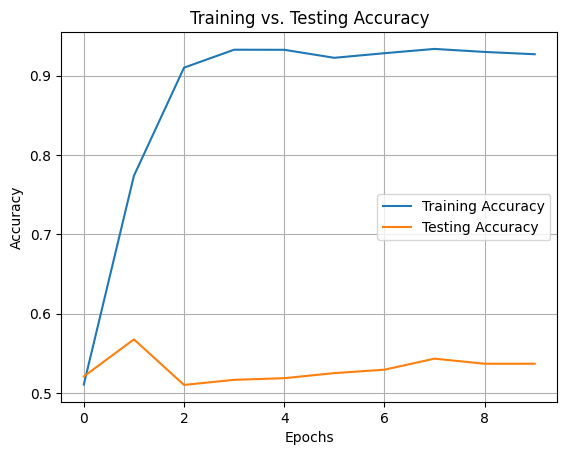

In [9]:
import matplotlib.pyplot as plt

# Replace with your actual training and testing accuracy values
train_acc = [0.5107, 0.7738, 0.9101, 0.9327, 0.9326, 0.9225, 0.9283, 0.9337, 0.9299, 0.9270]
test_acc = [0.5209, 0.5676, 0.5102, 0.5166, 0.5187, 0.5251, 0.5294, 0.5433, 0.5369, 0.5369]
epochs = range(len(train_acc))  # Epochs for the x-axis

# Plot training and testing accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()